In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

train_data = 'H:/train'
test_data = 'H:/test'

def one_hot_label(img):
    label = img.split('.')[0]
    if label == 'cat':
        ohl = np.array([1,0])
    elif label == 'dog':
        ohl = np.array([0,1])
    return ohl

In [4]:
def train_data_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(64,64))
        train_images.append([np.array(img),one_hot_label(i)])
    shuffle(train_images)
    return train_images

In [5]:
def test_data_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(64,64))
        test_images.append([np.array(img),one_hot_label(i)])
    shuffle(test_images)
    return test_images

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [7]:
training_images = train_data_label()
testing_images = test_data_label()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|██████████| 1000/1000 [00:01<00:00, 506.04it/s]


In [10]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=128,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

In [11]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=20,batch_size=100)

Train on 2000 samples
Epoch 1/20
2000/2000 [==============================] - ETA: 35s - loss: 1.2988 - accuracy: 0.570 - ETA: 20s - loss: 1.3663 - accuracy: 0.495 - ETA: 15s - loss: 1.1874 - accuracy: 0.493 - ETA: 12s - loss: 1.0806 - accuracy: 0.510 - ETA: 11s - loss: 1.0020 - accuracy: 0.520 - ETA: 9s - loss: 0.9629 - accuracy: 0.511 - ETA: 8s - loss: 0.9225 - accuracy: 0.50 - ETA: 7s - loss: 0.9013 - accuracy: 0.50 - ETA: 6s - loss: 0.8803 - accuracy: 0.50 - ETA: 6s - loss: 0.8598 - accuracy: 0.50 - ETA: 5s - loss: 0.8458 - accuracy: 0.51 - ETA: 4s - loss: 0.8343 - accuracy: 0.51 - ETA: 4s - loss: 0.8238 - accuracy: 0.51 - ETA: 3s - loss: 0.8149 - accuracy: 0.51 - ETA: 2s - loss: 0.8064 - accuracy: 0.52 - ETA: 2s - loss: 0.7973 - accuracy: 0.52 - ETA: 1s - loss: 0.7911 - accuracy: 0.52 - ETA: 1s - loss: 0.7891 - accuracy: 0.51 - ETA: 0s - loss: 0.7856 - accuracy: 0.51 - 11s 5ms/sample - loss: 0.7808 - accuracy: 0.5140
Epoch 2/20
2000/2000 [==============================] - ETA: 8s 

2000/2000 [==============================] - ETA: 9s - loss: 0.5141 - accuracy: 0.80 - ETA: 9s - loss: 0.5325 - accuracy: 0.77 - ETA: 8s - loss: 0.5375 - accuracy: 0.76 - ETA: 7s - loss: 0.5441 - accuracy: 0.75 - ETA: 7s - loss: 0.5406 - accuracy: 0.74 - ETA: 6s - loss: 0.5518 - accuracy: 0.74 - ETA: 6s - loss: 0.5565 - accuracy: 0.74 - ETA: 5s - loss: 0.5656 - accuracy: 0.73 - ETA: 5s - loss: 0.5635 - accuracy: 0.73 - ETA: 4s - loss: 0.5685 - accuracy: 0.71 - ETA: 4s - loss: 0.5857 - accuracy: 0.70 - ETA: 3s - loss: 0.5909 - accuracy: 0.70 - ETA: 3s - loss: 0.5914 - accuracy: 0.69 - ETA: 2s - loss: 0.5982 - accuracy: 0.68 - ETA: 2s - loss: 0.6020 - accuracy: 0.68 - ETA: 1s - loss: 0.6021 - accuracy: 0.68 - ETA: 1s - loss: 0.6041 - accuracy: 0.67 - ETA: 0s - loss: 0.6033 - accuracy: 0.68 - ETA: 0s - loss: 0.6052 - accuracy: 0.68 - 9s 5ms/sample - loss: 0.6083 - accuracy: 0.6765
Epoch 11/20
2000/2000 [==============================] - ETA: 8s - loss: 0.6856 - accuracy: 0.52 - ETA: 8s - 

2000/2000 [==============================] - ETA: 8s - loss: 0.4541 - accuracy: 0.76 - ETA: 8s - loss: 0.3484 - accuracy: 0.84 - ETA: 8s - loss: 0.3257 - accuracy: 0.85 - ETA: 7s - loss: 0.3198 - accuracy: 0.85 - ETA: 7s - loss: 0.3208 - accuracy: 0.86 - ETA: 6s - loss: 0.3169 - accuracy: 0.86 - ETA: 6s - loss: 0.3131 - accuracy: 0.86 - ETA: 5s - loss: 0.3042 - accuracy: 0.87 - ETA: 5s - loss: 0.2995 - accuracy: 0.87 - ETA: 4s - loss: 0.2927 - accuracy: 0.87 - ETA: 4s - loss: 0.2853 - accuracy: 0.88 - ETA: 3s - loss: 0.2852 - accuracy: 0.87 - ETA: 3s - loss: 0.2928 - accuracy: 0.87 - ETA: 2s - loss: 0.2874 - accuracy: 0.87 - ETA: 2s - loss: 0.2893 - accuracy: 0.87 - ETA: 1s - loss: 0.2824 - accuracy: 0.87 - ETA: 1s - loss: 0.2854 - accuracy: 0.87 - ETA: 0s - loss: 0.2989 - accuracy: 0.87 - ETA: 0s - loss: 0.2978 - accuracy: 0.87 - 9s 5ms/sample - loss: 0.2941 - accuracy: 0.8735
Epoch 20/20
2000/2000 [==============================] - ETA: 8s - loss: 0.2255 - accuracy: 0.93 - ETA: 8s - 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 128)        

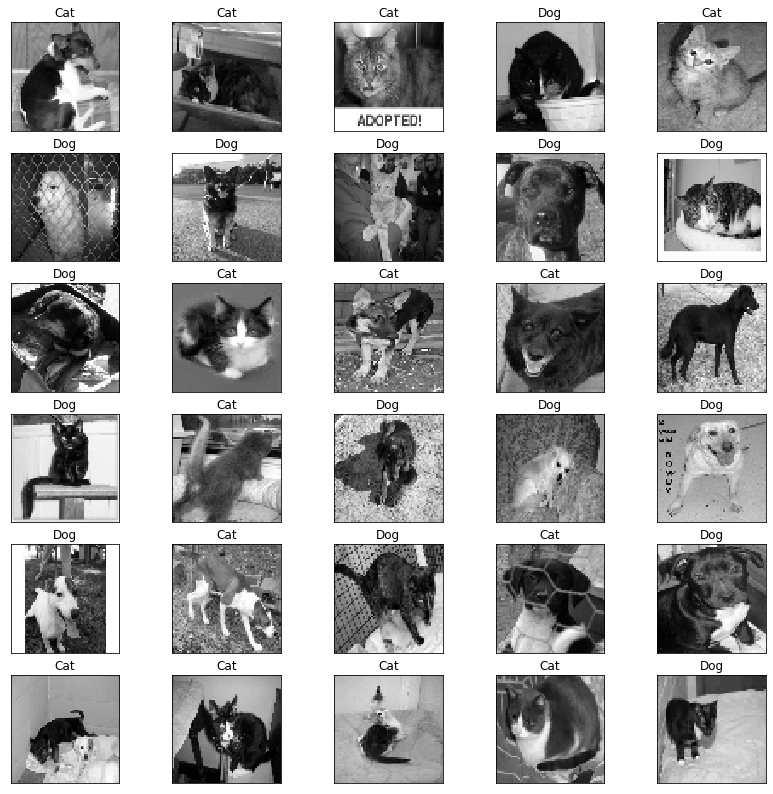

In [13]:
fig = plt.figure(figsize=(14,14))
for cnt,data in enumerate(testing_images[30:60]):
    y = fig.add_subplot(6,5,cnt+1)
    img = data[0]
    data = img.reshape(1,64,64,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'
        
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)